<a href="https://colab.research.google.com/github/Tirta2241720045/PCVK_Ganjil_2024/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


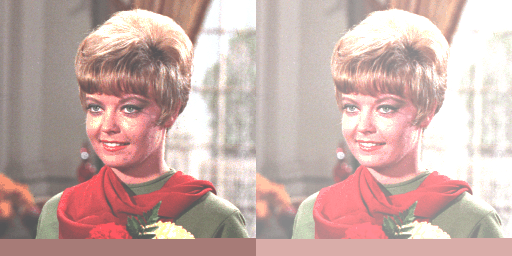

In [ ]:
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')
original = cv.imread('/content/drive/MyDrive/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)


#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

**TUGAS**

 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukan tingkat kecerahan [-255 - 255]:60
Masukkan kontras [1.0 - 3.0]:1.5


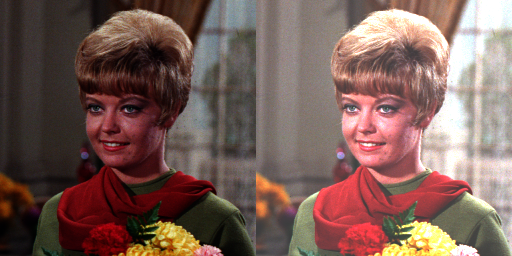

In [ ]:
print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------------------')

try:
  brightness = int(input('Masukan tingkat kecerahan [-255 - 255]:'))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]:'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images1/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

 Mengubah tingkat kecerahan citra dengan Transformasi Log
----------------------------------------------
Masukkan nilai kecerahan:40


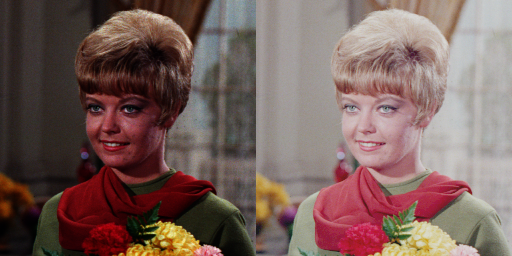

In [ ]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('----------------------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan:'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images1/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*  (np.log(1 + original[y,x,c])), 0 , 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

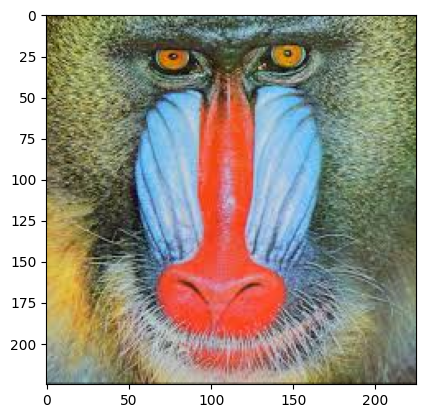

In [ ]:
img = cv.imread('/content/drive/MyDrive/mandrill.tiff')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

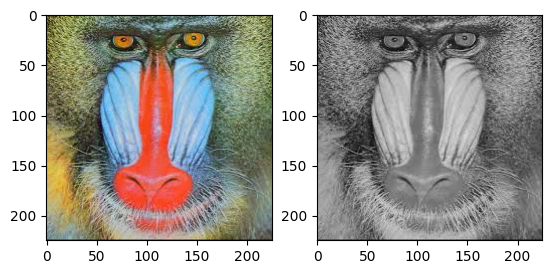

In [ ]:
# a. Averaging

img_avg = cv.imread('/content/drive/MyDrive/mandrill.tiff')
img_avg[:] = img_avg.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)

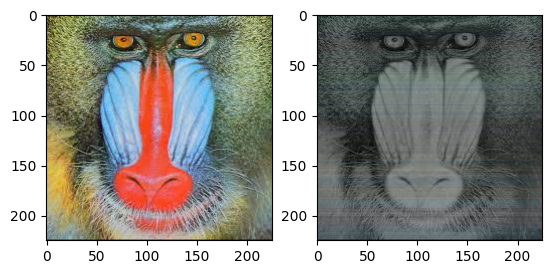

In [ ]:
# b. Lightness

img_light = cv.imread('/content/drive/MyDrive/mandrill.tiff')
img_light[:] = np.max(img_light, axis=-1, keepdims=100)/2 + np.min(img_light, axis=-2, keepdims=100)/3
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_light)

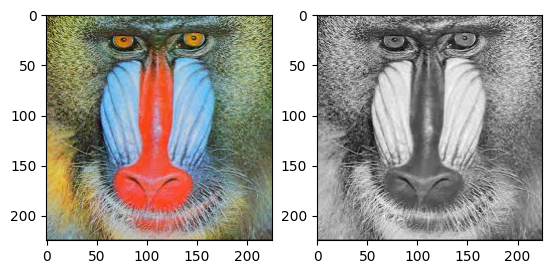

In [ ]:
# c. Luminance

img_lum = cv.imread('/content/drive/MyDrive/mandrill.tiff')
R, G, B = img_lum[: , : , 0], img_lum[: , : , 1], img_lum[: , : , 2]
gray_img_lum = (0.24 * R) + (0.77 * G) + (0.06 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(gray_img_lum, cmap = 'gray')

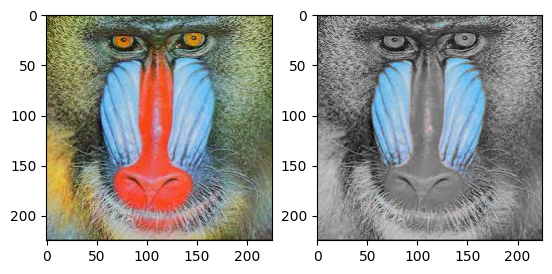

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Memuat gambar
img = cv.imread('/content/drive/MyDrive/mandrill.tiff')

# Membuat masker untuk warna biru
# Menggunakan saluran biru (saluran pertama, [:,:,0])
ret, mask = cv.threshold(img[:, :, 0], 180, 255, cv.THRESH_BINARY)

# Membuat masker tiga saluran
mask3 = np.zeros_like(img)
mask3[:, :, 0] = mask  # Saluran biru
mask3[:, :, 1] = mask  # Saluran hijau
mask3[:, :, 2] = mask  # Saluran merah

# Mengambil bagian biru dari gambar asli
blue = cv.bitwise_and(img, mask3)

# Mengubah gambar menjadi skala abu-abu
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_gray = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# Menggabungkan gambar skala abu-abu dan bagian biru
gray = cv.bitwise_and(img_gray, 255 - mask3)
out = gray + blue

# Menampilkan gambar asli dan hasilnya
fig, ax = plt.subplots(1, 2)
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(out, cv.COLOR_BGR2RGB))
plt.show()